So far, we've learned about design and data storytelling. In this file, we're going to focus our attention on Matplotlib's pre-defined styles. For this case study, we'll use the `fivethirtyeight` style to build this graph.

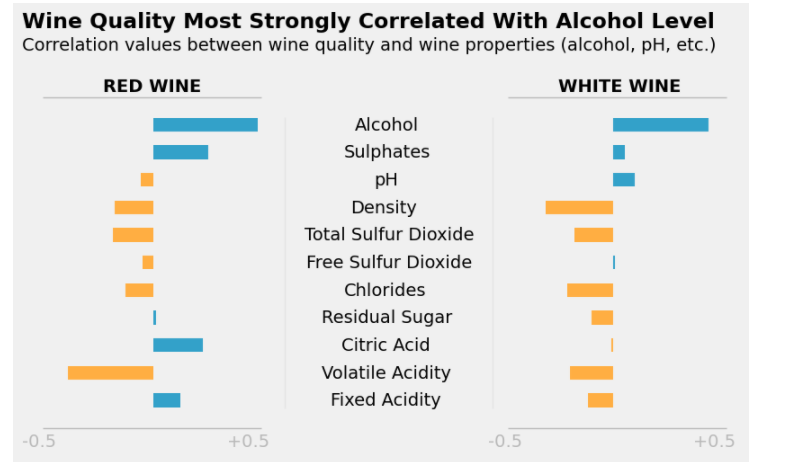

Matplotlib's pre-defined styles change the default visual properties of graphs. Below, we create a line plot using the `Solarize_Light2` style. To do that, we import the [`matplotlib.style` submodule](https://matplotlib.org/api/style_api.html) and then use the [`style.use()` function](https://matplotlib.org/api/style_api.html#matplotlib.style.use).

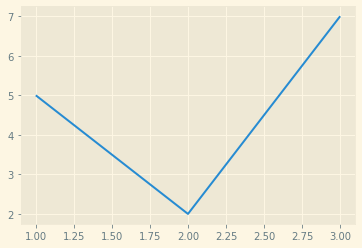

In [1]:
import matplotlib.pyplot as plt
import matplotlib.style as style

style.use('Solarize_Light2')
plt.plot([1, 2, 3], [5, 2, 7])
plt.show()

Note that we must use the `style.use()` function before we create the graph — before calling the `plt.plot()` function.

After we call `style.use('Solarize_Light2')`, all subsequent graphs will inherit this style. To get back to the default settings, we need to use `style.use('default')`.

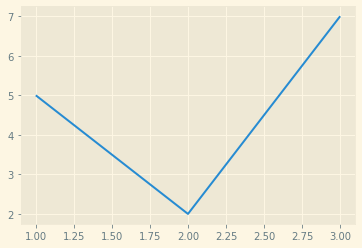

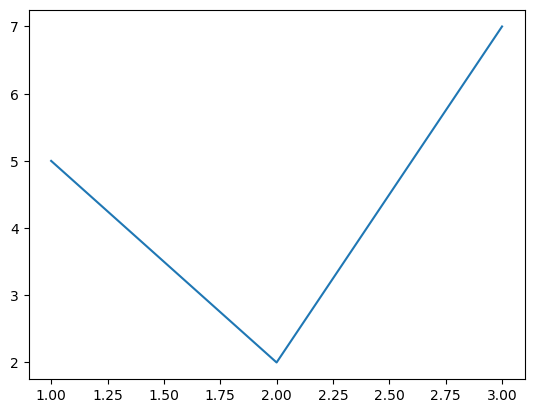

In [2]:
style.use('Solarize_Light2')
plt.plot([1, 2, 3], [5, 2, 7])
plt.show()

style.use('default')
plt.plot([1, 2, 3], [5, 2, 7])
plt.show()

We can see all the available styles by accessing the [`style.available` attribute](https://matplotlib.org/api/style_api.html#matplotlib.style.matplotlib.style.available).

In [4]:
print(style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


If we want to switch between different styles, use `style.use('default')` between each change — some of the styles can interfere with one another.

**Task**

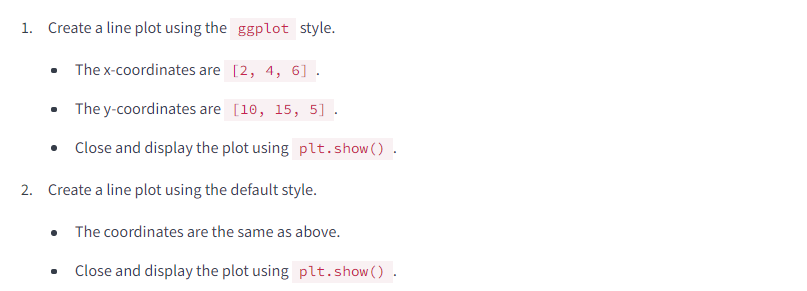

**Answer**

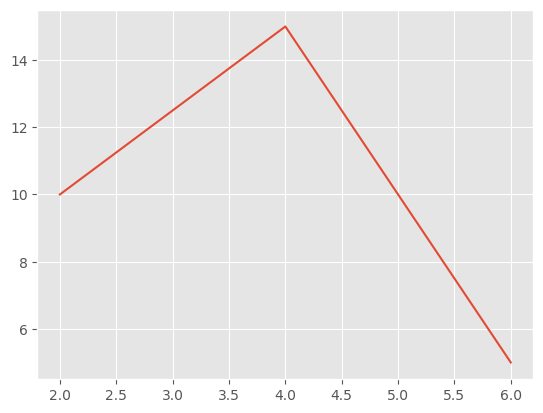

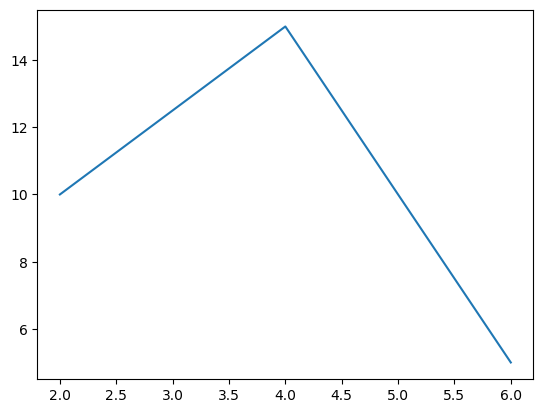

In [5]:
import matplotlib.style as style
style.use('ggplot')
plt.plot([2, 4, 6], [10, 15, 5])
plt.show()

style.use('default')
plt.plot([2, 4, 6], [10, 15, 5])
plt.show()

We'll now take one Matplotlib style and build upon it — the `fivethirtyeight` style. We've already seen two FiveThirtyEight graphs in our previous file. We can see more of their graphs [here](https://fivethirtyeight.com/features/the-40-weirdest-and-best-charts-we-made-in-2020/).

We're going to use a dataset on wine quality. Researchers P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. collected this data for their research paper. We can find documentation and download the dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality).

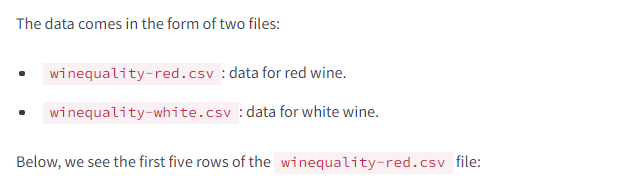

In [6]:
import pandas as pd
red_wine = pd.read_csv('winequality-red.csv', sep=';')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


We want to determine which attributes (pH, alcohol level, etc.) most strongly correlate with wine quality. Below, we see the correlation values between `quality` and the other columns 

In [10]:
red_corr = red_wine.corr()['quality'][:-1]
red_corr

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64

Red wine quality most strongly correlates with alcohol level and volatile acidity. If we're curious, we can find information on the Internet on each wine property. In [this article](https://extension.psu.edu/volatile-acidity-in-wine), for instance, we see that volatile acidity contributes to the smell and taste of vinegar in wine.

Let's now calculate correlations for the white wine dataset.

In [8]:
white_wine = pd.read_csv('winequality-white.csv', sep=';')
white_corr = white_wine.corr()['quality'][:-1]
white_corr

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
Name: quality, dtype: float64

Previously, we calculated the correlation values between wine quality and wine properties. We want to represent these values visually in the form of two bar plots. Below, we can see what we want to build.

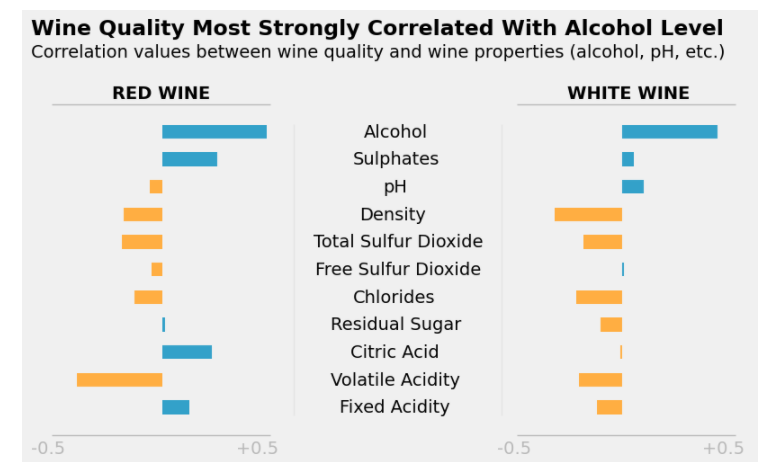

Let's start by creating the two bar plots using the fivethirtyeight style.

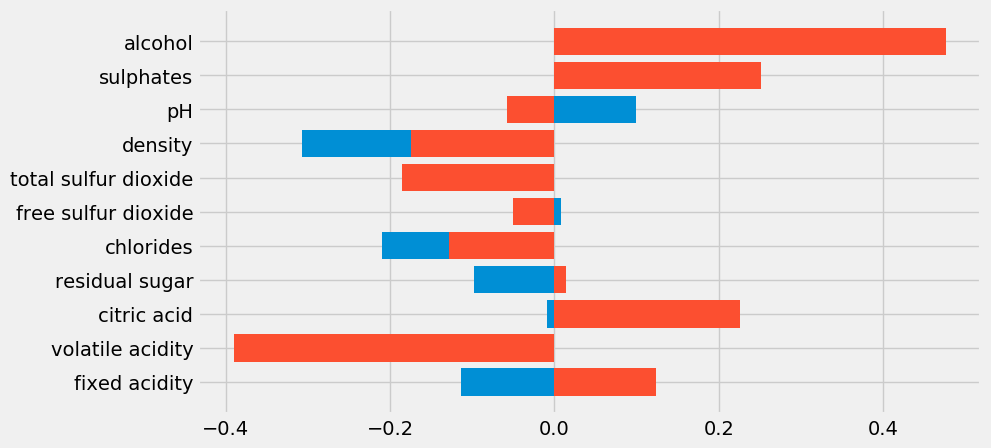

In [11]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(white_corr.index, white_corr)
ax.barh(red_corr.index, red_corr)
plt.show()

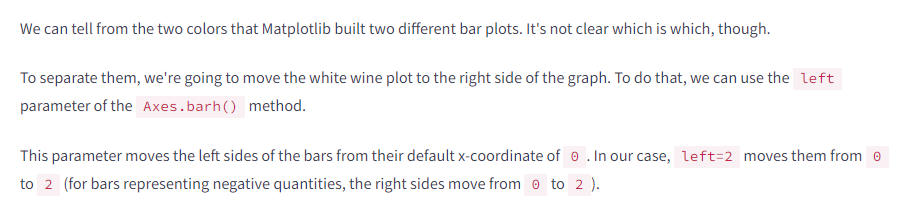

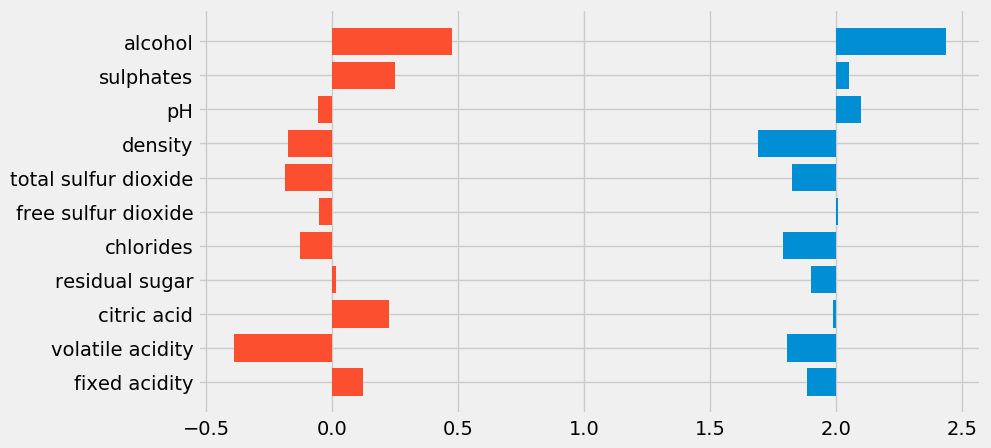

In [12]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(white_corr.index, white_corr, left=2)
ax.barh(red_corr.index, red_corr)
plt.show()

Based on the principle of proximity, we now see two different bar plots: the red wine plot on the right (red-colored), and the white wine plot on the left (blue-colored).

To maximize the data-ink ratio, let's now erase the following:

* Non-data ink
* Redundant data ink

**Task**

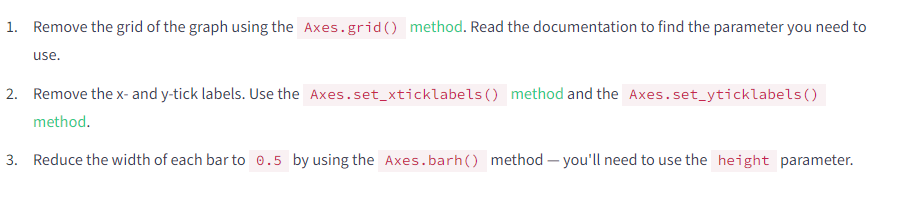

**Answer**

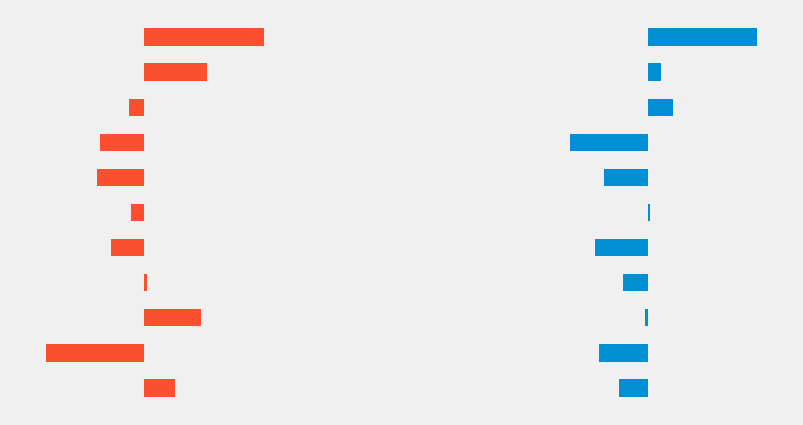

In [13]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 5))

ax.barh(white_corr.index, white_corr, left=2, height=0.5)
ax.barh(red_corr.index, red_corr, height=0.5)

ax.grid(b=False)
ax.set_yticklabels([])
ax.set_xticklabels([])

plt.show()

Above, we erased the grid and the `x- and y-tick` labels, and we reduced the `width` of the bars. 

We'll now focus on adding structural elements so the audience can read the graph.

We begin by adding `y-tick` labels in the center of the graph — both **bar plots** have the same` y-tick` labels. Below, we add the labels using `Axes.text()` and specify the coordinates manually.

This can be a bit cumbersome, but it also gives us the precision and flexibility we need.

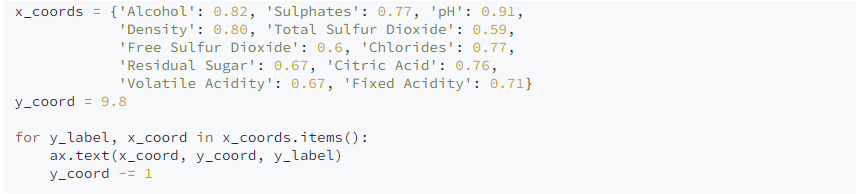

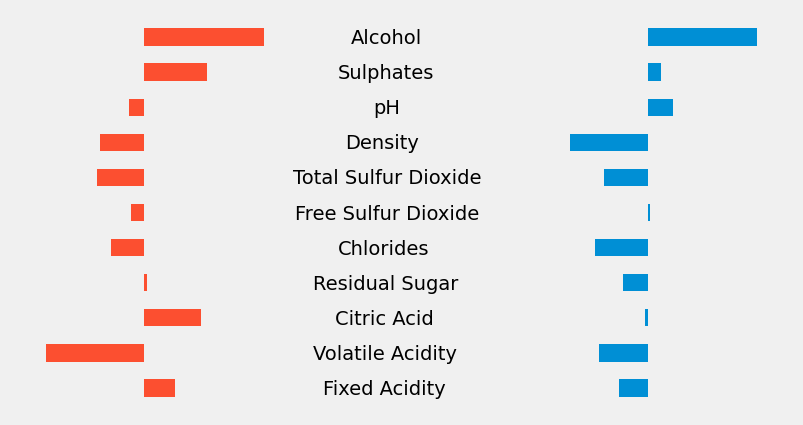

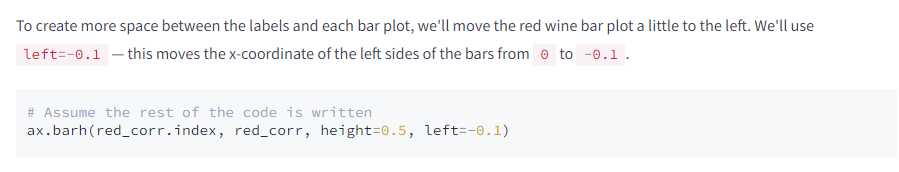

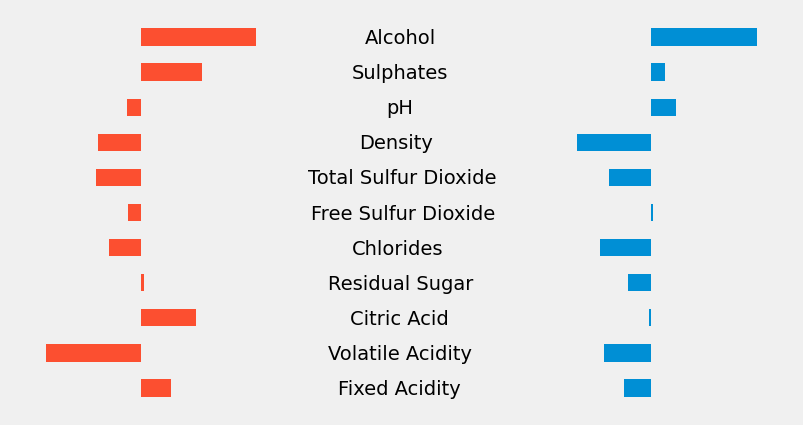

To visually separate the labels from the bar plots, we're going to add two vertical lines — one to the left of the labels column, and the other to the right, like this:

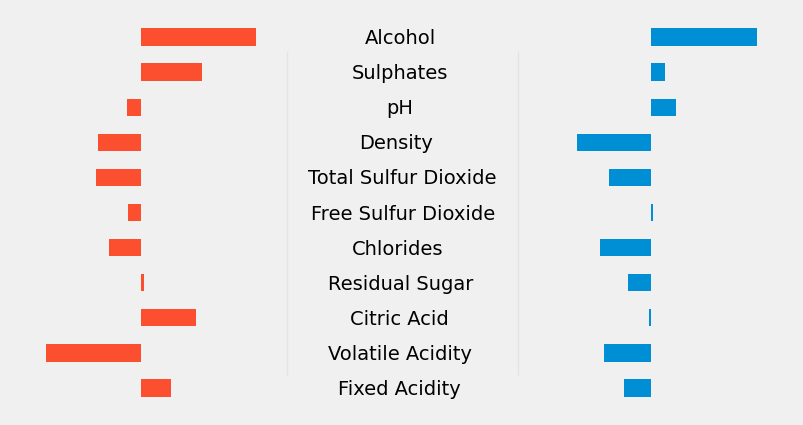

**Task**

Using the [Axes.axvline()](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.axvline.html) method:

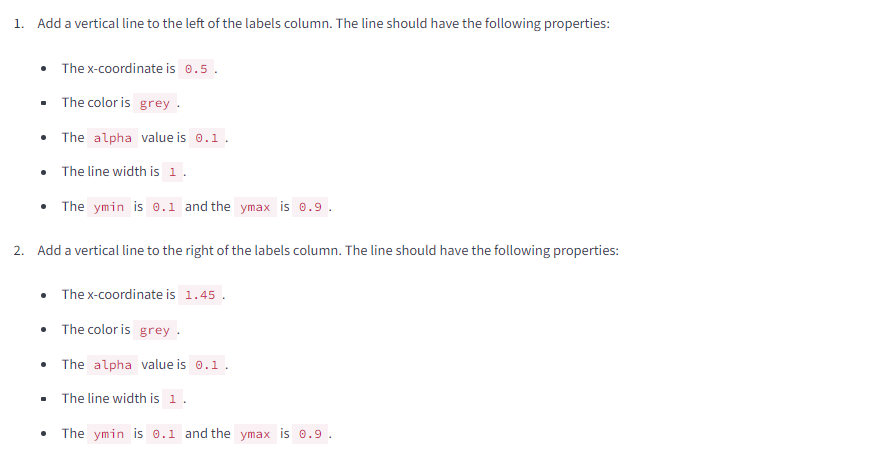

**Answer**

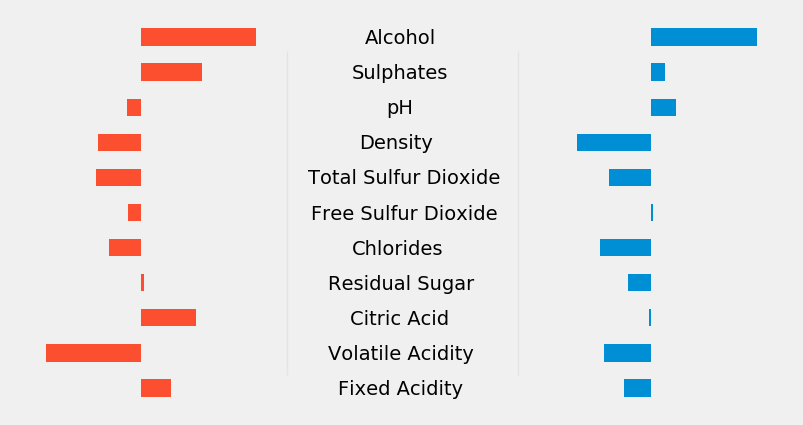

In [14]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(white_corr.index, white_corr, left=2, height=0.5)
ax.barh(red_corr.index, red_corr, height=0.5, left=-0.1)

ax.grid(b=False)
ax.set_yticklabels([])
ax.set_xticklabels([])

x_coords = {'Alcohol': 0.82, 'Sulphates': 0.77, 'pH': 0.91,
            'Density': 0.80, 'Total Sulfur Dioxide': 0.59,
            'Free Sulfur Dioxide': 0.6, 'Chlorides': 0.77,
            'Residual Sugar': 0.67, 'Citric Acid': 0.76,
            'Volatile Acidity': 0.67, 'Fixed Acidity': 0.71}
y_coord = 9.8
for y_label, x_coord in x_coords.items():
    ax.text(x_coord, y_coord, y_label)
    y_coord -= 1

ax.axvline(0.5, c='grey', alpha=0.1, linewidth=1,
           ymin=0.1, ymax=0.9)
ax.axvline(1.45, c='grey', alpha=0.1, linewidth=1,
           ymin=0.1, ymax=0.9)
plt.show()

Above, we focused on adding y-tick labels. Now, we need to add x-tick labels so the audience can read the correlation values.

To do that, we're going to add a horizontal line under each bar plot. Note that we control the position of the lines along the x-axis through the `xmin` and the `xmax` parameters.

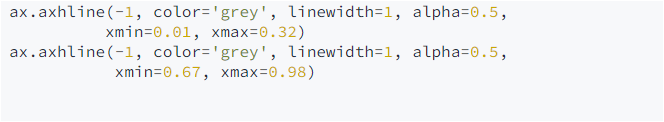

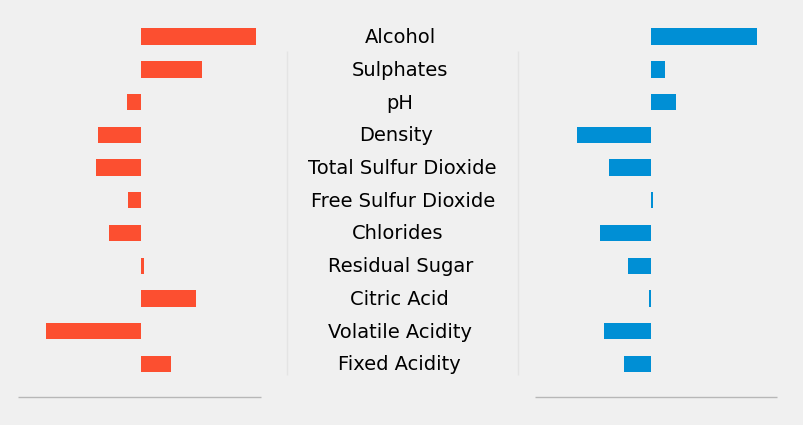

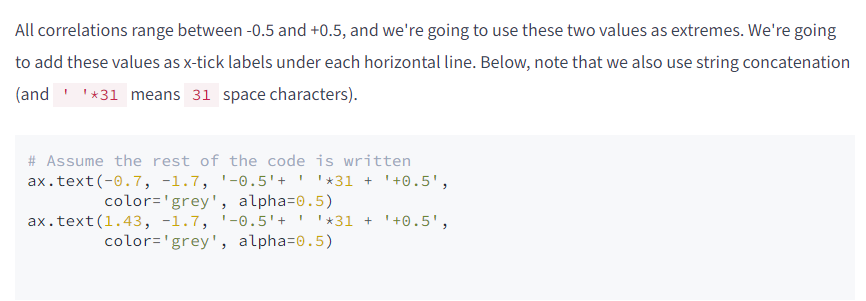

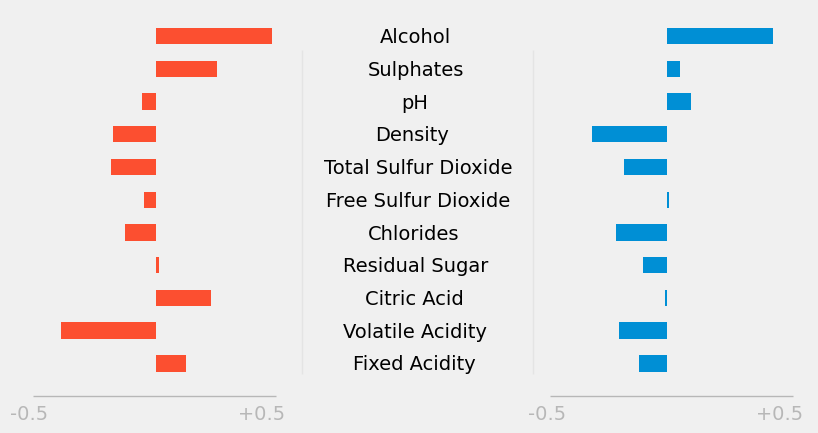

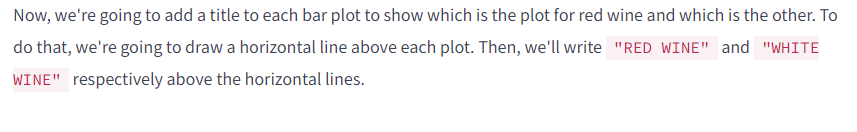

**Task**

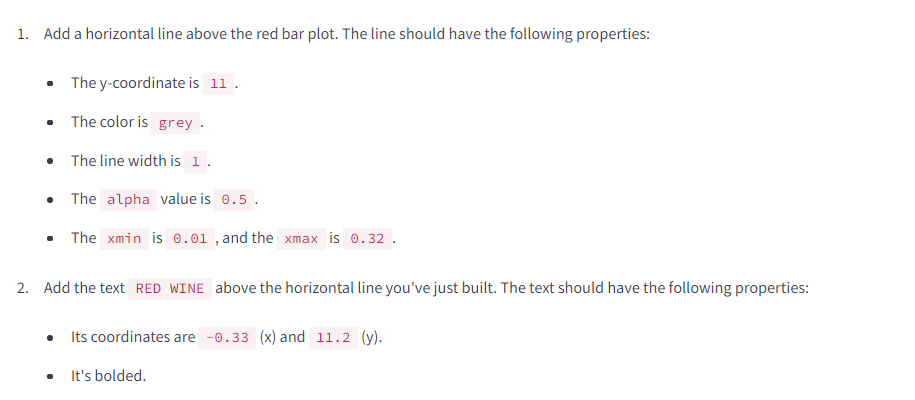

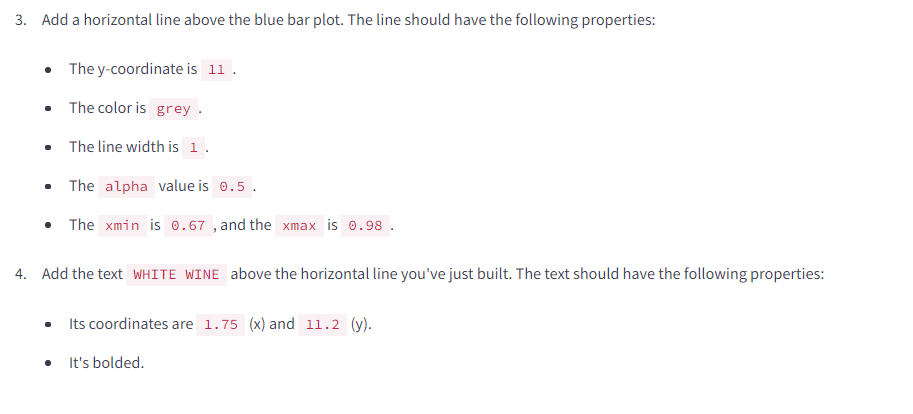

**Answer**

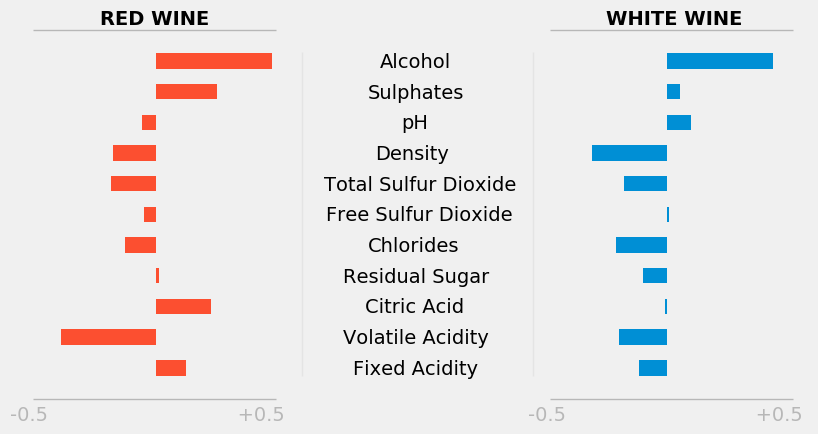

In [15]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(white_corr.index, white_corr, left=2, height=0.5)
ax.barh(red_corr.index, red_corr, height=0.5, left=-0.1)

ax.grid(b=False)
ax.set_yticklabels([])
ax.set_xticklabels([])

x_coords = {'Alcohol': 0.82, 'Sulphates': 0.77, 'pH': 0.91,
            'Density': 0.80, 'Total Sulfur Dioxide': 0.59,
            'Free Sulfur Dioxide': 0.6, 'Chlorides': 0.77,
            'Residual Sugar': 0.67, 'Citric Acid': 0.76,
            'Volatile Acidity': 0.67, 'Fixed Acidity': 0.71}
y_coord = 9.8

for y_label, x_coord in x_coords.items():
    ax.text(x_coord, y_coord, y_label)
    y_coord -= 1
    
ax.axvline(0.5, c='grey', alpha=0.1, linewidth=1,
           ymin=0.1, ymax=0.9)
ax.axvline(1.45, c='grey', alpha=0.1, linewidth=1,
           ymin=0.1, ymax=0.9)

ax.axhline(-1, color='grey', linewidth=1, alpha=0.5,
          xmin=0.01, xmax=0.32)
ax.text(-0.7, -1.7, '-0.5'+ ' '*31 + '+0.5',
        color='grey', alpha=0.5)
ax.axhline(-1, color='grey', linewidth=1, alpha=0.5,
           xmin=0.67, xmax=0.98)
ax.text(1.43, -1.7, '-0.5'+ ' '*31 + '+0.5',
        color='grey', alpha=0.5)

ax.axhline(11, color='grey', linewidth=1, alpha=0.5,
          xmin=0.01, xmax=0.32)
ax.text(-0.33, 11.2, 'RED WINE', weight='bold')

ax.axhline(11, color='grey', linewidth=1, alpha=0.5,
          xmin=0.67, xmax=0.98)
ax.text(1.75, 11.2, 'WHITE WINE', weight='bold')
plt.show()

FiveThirtyEight graphs generally have a signature bar at the bottom, where we see the creator's name and the data source.

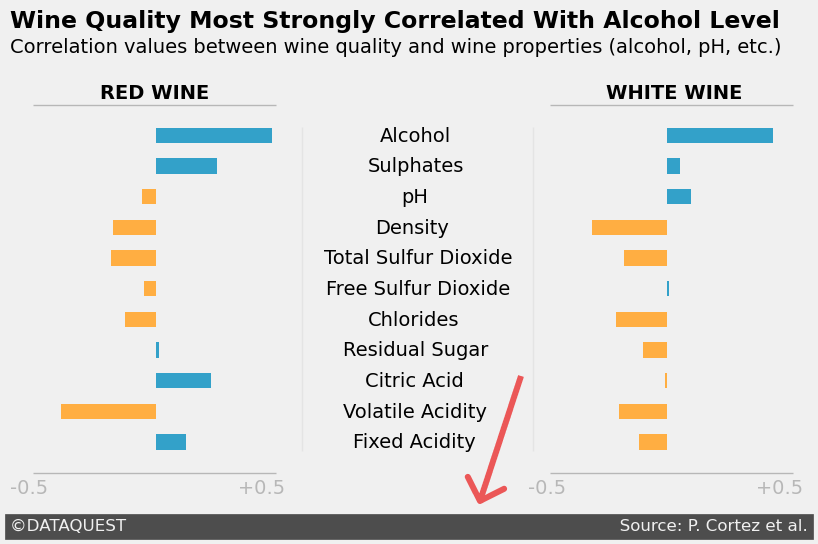

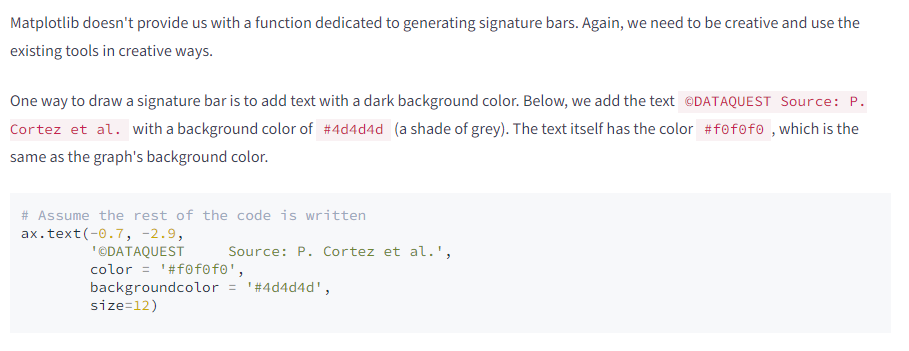

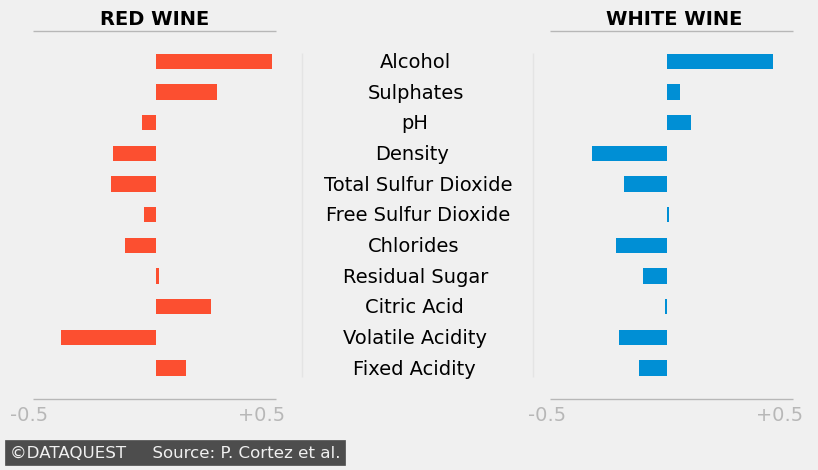

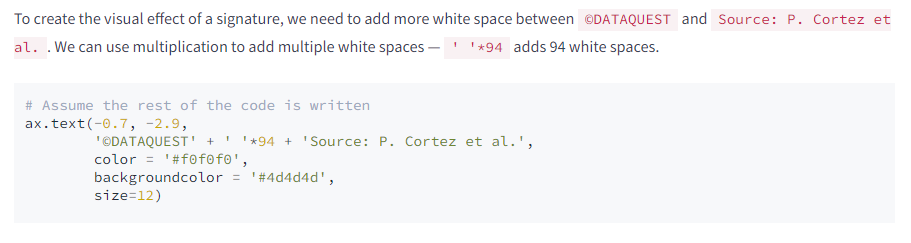

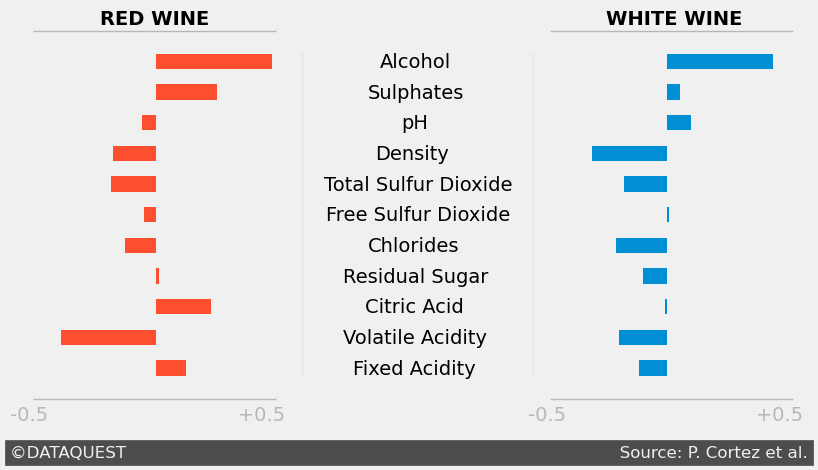

Note that we perceive the creator's name and the data source as grouped together. They are part of the same group (part of the signature) thanks to the enclosure we create with the dark grey rectangle.

Let's now add a title and a subtitle to our graph. To maximize data-ink, we're going to do the following:

* We'll use the title to show data.
* We'll use the subtitle to explain the numerical values.

**Task**

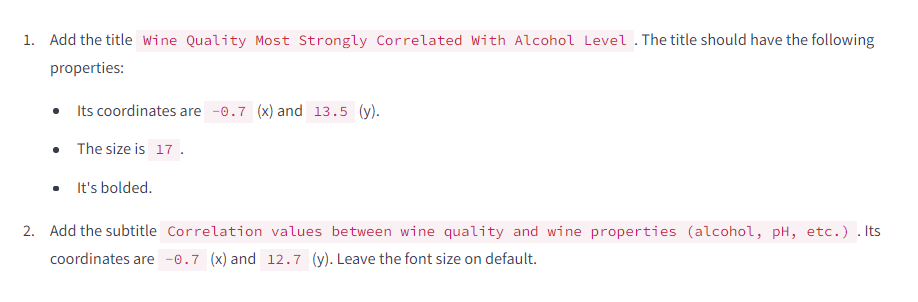

**Answer**

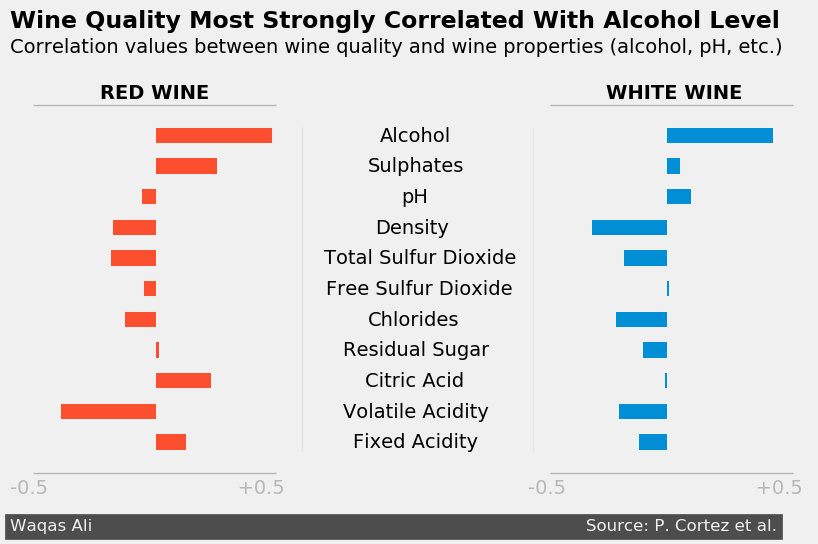

In [17]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(white_corr.index, white_corr, left=2, height=0.5)
ax.barh(red_corr.index, red_corr, height=0.5, left=-0.1)

ax.grid(b=False)
ax.set_yticklabels([])
ax.set_xticklabels([])

x_coords = {'Alcohol': 0.82, 'Sulphates': 0.77, 'pH': 0.91,
            'Density': 0.80, 'Total Sulfur Dioxide': 0.59,
            'Free Sulfur Dioxide': 0.6, 'Chlorides': 0.77,
            'Residual Sugar': 0.67, 'Citric Acid': 0.76,
            'Volatile Acidity': 0.67, 'Fixed Acidity': 0.71}
y_coord = 9.8
for y_label, x_coord in x_coords.items():
    ax.text(x_coord, y_coord, y_label)
    y_coord -= 1
    
ax.axvline(0.5, c='grey', alpha=0.1, linewidth=1,
           ymin=0.1, ymax=0.9)
ax.axvline(1.45, c='grey', alpha=0.1, linewidth=1,
           ymin=0.1, ymax=0.9)

ax.axhline(-1, color='grey', linewidth=1, alpha=0.5,
          xmin=0.01, xmax=0.32)
ax.text(-0.7, -1.7, '-0.5'+ ' '*31 + '+0.5',
        color='grey', alpha=0.5)
ax.axhline(-1, color='grey', linewidth=1, alpha=0.5,
           xmin=0.67, xmax=0.98)
ax.text(1.43, -1.7, '-0.5'+ ' '*31 + '+0.5',
        color='grey', alpha=0.5)

ax.axhline(11, color='grey', linewidth=1, alpha=0.5,
           xmin=0.01, xmax=0.32)
ax.text(-0.33, 11.2, 'RED WINE', weight='bold')
ax.axhline(11, color='grey', linewidth=1, alpha=0.5,
           xmin=0.67, xmax=0.98)
ax.text(1.75, 11.2, 'WHITE WINE', weight='bold')

# ax.text(-0.7, -2.9,
#         '©DATAQUEST' + ' '*94 + 'Source: P. Cortez et al.',
#         color = '#f0f0f0', backgroundcolor = '#4d4d4d',
#         size=12)

ax.text(-0.7, -2.9,
        'Waqas Ali' + ' '*94 + 'Source: P. Cortez et al.',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=12)

ax.text(-0.7, 13.5,
        'Wine Quality Most Strongly Correlated With Alcohol Level',
        size=17, weight='bold')
ax.text(-0.7, 12.7,
        'Correlation values between wine quality and wine properties (alcohol, pH, etc.)')
plt.show()

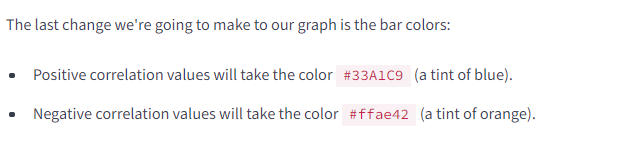

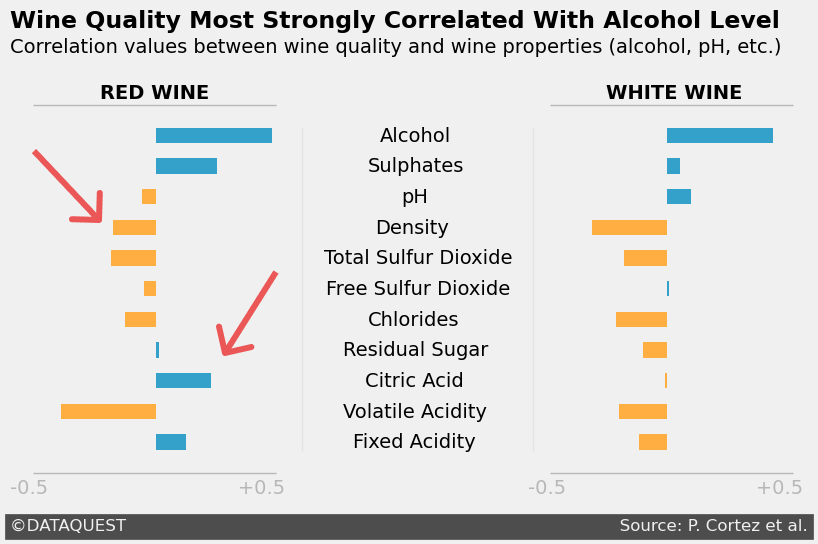

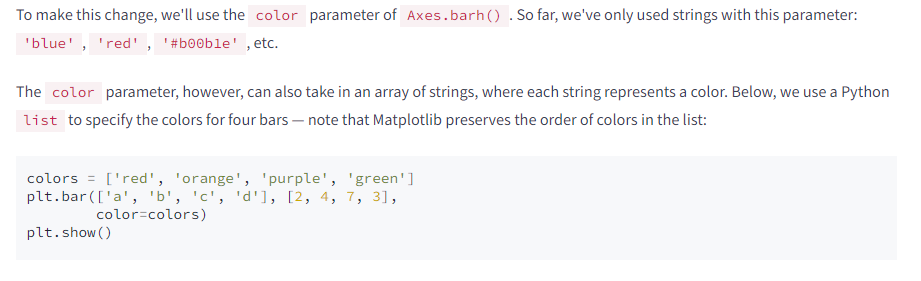

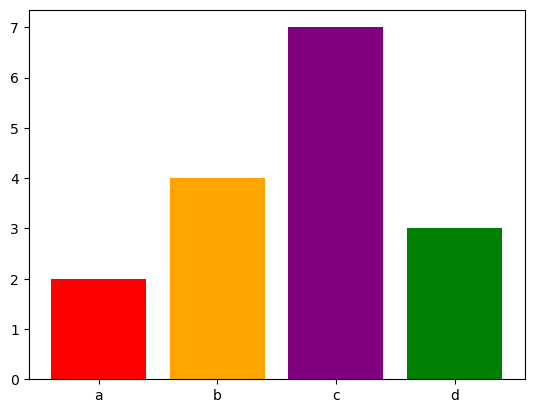

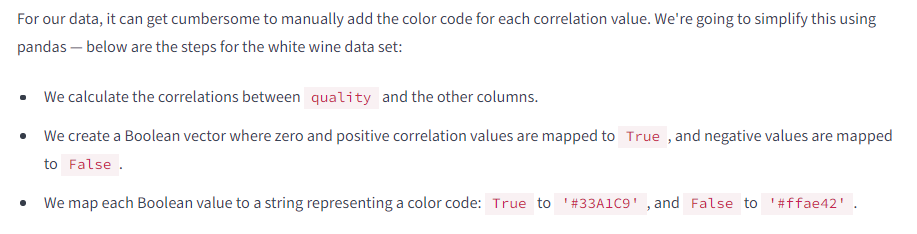

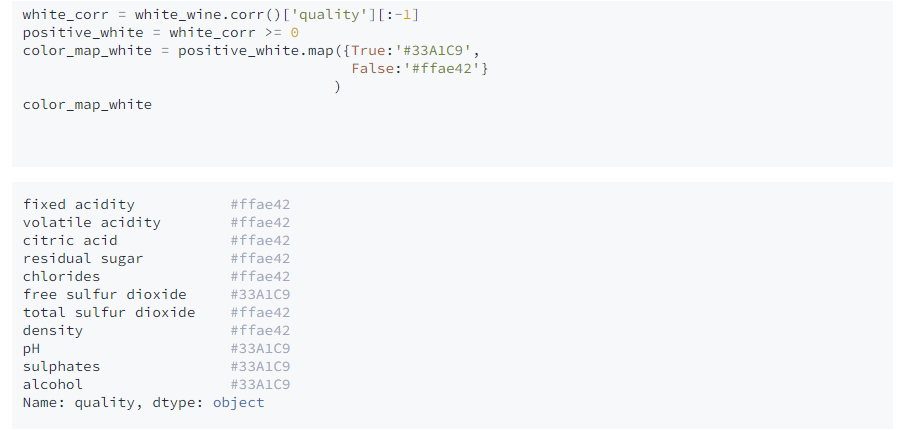

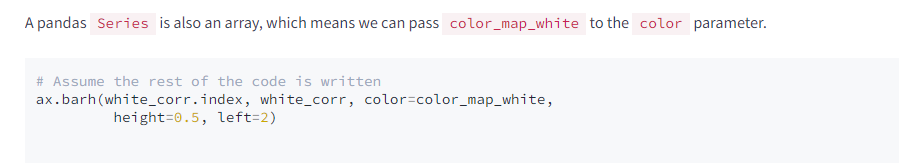

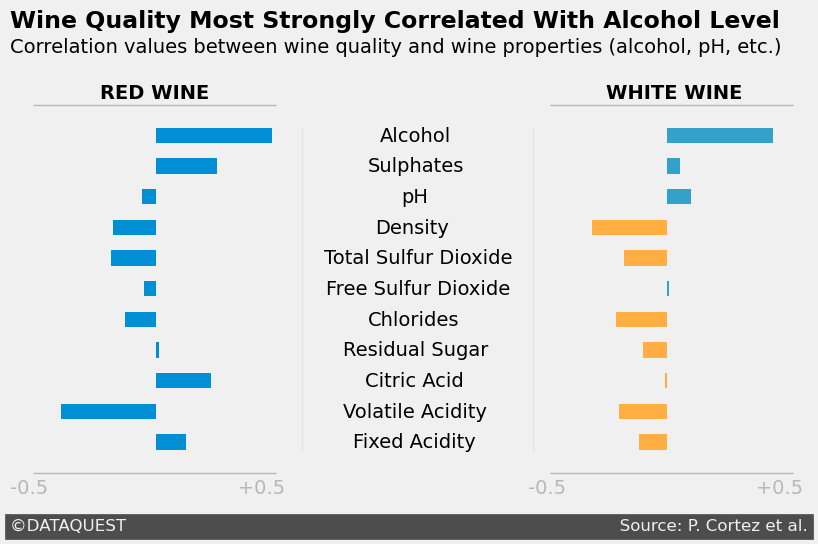

**Task**

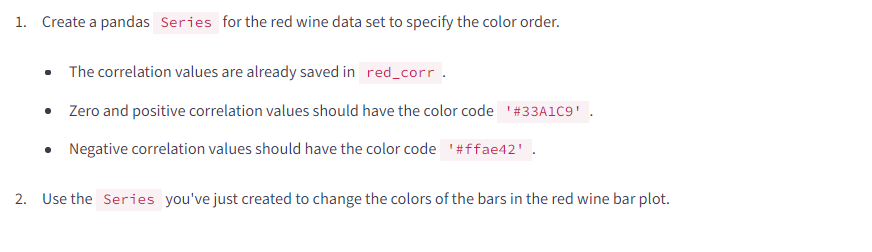

**Answer**

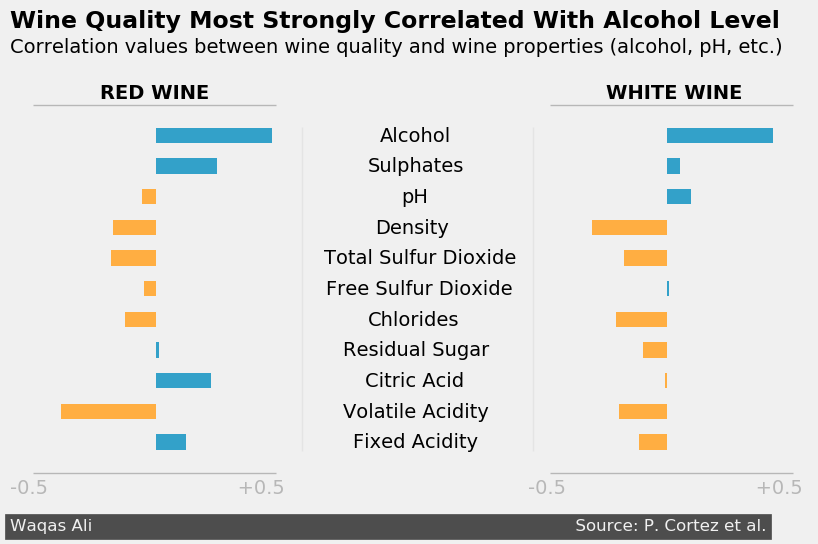

In [18]:
positive_white = white_corr >= 0
color_map_white = positive_white.map({True:'#33A1C9', False:'#ffae42'})

style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(white_corr.index, white_corr, left=2, height=0.5,
        color=color_map_white)
#ax.barh(red_corr.index, red_corr, height=0.5, left=-0.1)

ax.grid(b=False)
ax.set_yticklabels([])
ax.set_xticklabels([])

x_coords = {'Alcohol': 0.82, 'Sulphates': 0.77, 'pH': 0.91,
            'Density': 0.80, 'Total Sulfur Dioxide': 0.59,
            'Free Sulfur Dioxide': 0.6, 'Chlorides': 0.77,
            'Residual Sugar': 0.67, 'Citric Acid': 0.76,
            'Volatile Acidity': 0.67, 'Fixed Acidity': 0.71}
y_coord = 9.8

for y_label, x_coord in x_coords.items():
    ax.text(x_coord, y_coord, y_label)
    y_coord -= 1
    
ax.axvline(0.5, c='grey', alpha=0.1, linewidth=1,
           ymin=0.1, ymax=0.9)
ax.axvline(1.45, c='grey', alpha=0.1, linewidth=1,
           ymin=0.1, ymax=0.9)

ax.axhline(-1, color='grey', linewidth=1, alpha=0.5,
          xmin=0.01, xmax=0.32)
ax.text(-0.7, -1.7, '-0.5'+ ' '*31 + '+0.5',
        color='grey', alpha=0.5)

ax.axhline(-1, color='grey', linewidth=1, alpha=0.5,
           xmin=0.67, xmax=0.98)
ax.text(1.43, -1.7, '-0.5'+ ' '*31 + '+0.5',
        color='grey', alpha=0.5)

ax.axhline(11, color='grey', linewidth=1, alpha=0.5,
          xmin=0.01, xmax=0.32)
ax.text(-0.33, 11.2, 'RED WINE', weight='bold')

ax.axhline(11, color='grey', linewidth=1, alpha=0.5,
          xmin=0.67, xmax=0.98)
ax.text(1.75, 11.2, 'WHITE WINE', weight='bold')

ax.text(-0.7, -2.9, 'Waqas Ali' + ' '*92 + 'Source: P. Cortez et al.',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
       size=12)

ax.text(-0.7, 13.5,
        'Wine Quality Most Strongly Correlated With Alcohol Level',
        size=17, weight='bold')
ax.text(-0.7, 12.7,
        'Correlation values between wine quality and wine properties (alcohol, pH, etc.)')

positive_red = red_corr >= 0
color_map_red = positive_red.map({True:'#33A1C9', False:'#ffae42'})
ax.barh(red_corr.index, red_corr, height=0.5, left=-0.1,
        color=color_map_red)
plt.show()

In this file, we learned about Matplotlib styles. We focused on the `fivethirtyeight` style and managed to build quite a nice graph.

